In [3]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
raw_data=pd.read_csv("raw_data.csv")
raw_data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.00,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,Golf IV


In [5]:
#Cleaning and preprocessing dataset
#checking null values
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [69]:
#this Data analysis project aims to predict the price of cars with relationships of different important featues: Mileage, Engine volume and Year.

In [7]:
data=raw_data.copy()
data.dropna(axis=0,inplace=True)

In [9]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [11]:
#In our Analysis we will not rely on the model varibale, we will use the Year varibale instead of it so we will drop the Model column
data.drop("Model",axis=1,inplace=True)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985


In [13]:
#Checking outliers
#We need to remove outliers related to numerical features data in order to make a cleaned dataset and ease the analysis process
#We will rely on the quantile techniques
#We will use plotting methods to
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

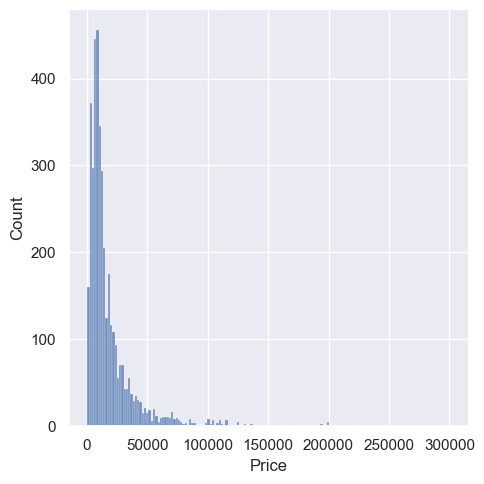

In [15]:
#Let's start with cleaning outliers from the Price data
sns.displot(data["Price"])

In [17]:
#It's clear that we have outlires to remove to decrease the severe right skeweness. 
#we will calculate q=quartile(0.99) of the Price data and consider a new dataset
#that Prices < quantile(0.99)
q=data[["Price"]].quantile(0.99)[0]
q

129812.51999999981

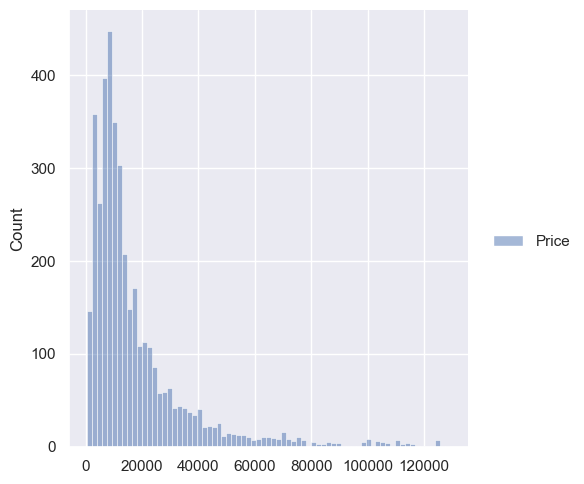

In [19]:
data2=data[data["Price"]<q]
sns.displot(data2[["Price"]])

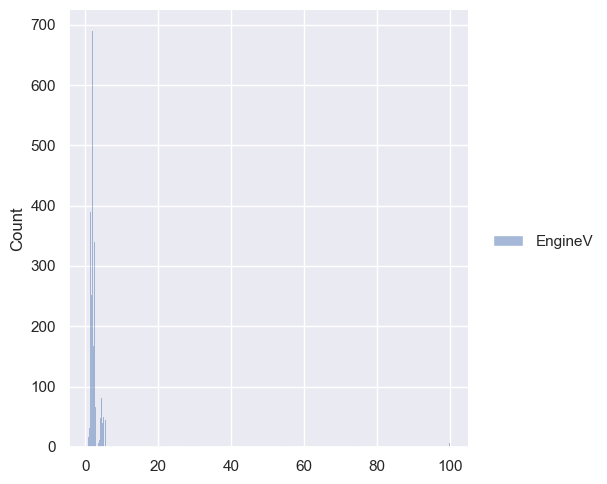

In [21]:
#Outliers of "EngineV" (Engine Volume)
sns.displot(data2[["EngineV"]])

In [23]:
#From the graph we can know that the majority of engine volumes are under 6.5 or 7 so we take q=6.5
q=6.5
data3=data2[data['EngineV']<q]

C:\Users\gayth\AppData\Local\Temp\ipykernel_23096\1986240902.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data3=data2[data['EngineV']<q]


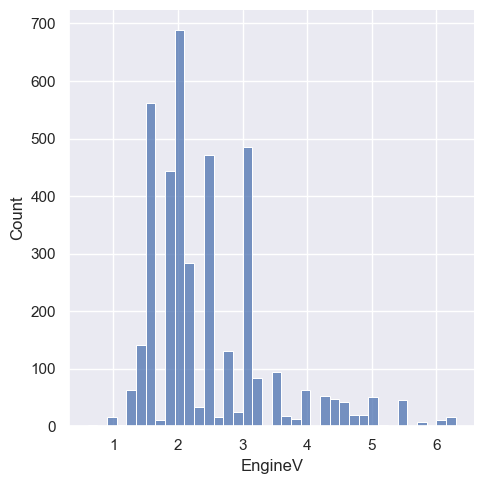

In [25]:
sns.displot(data3["EngineV"])

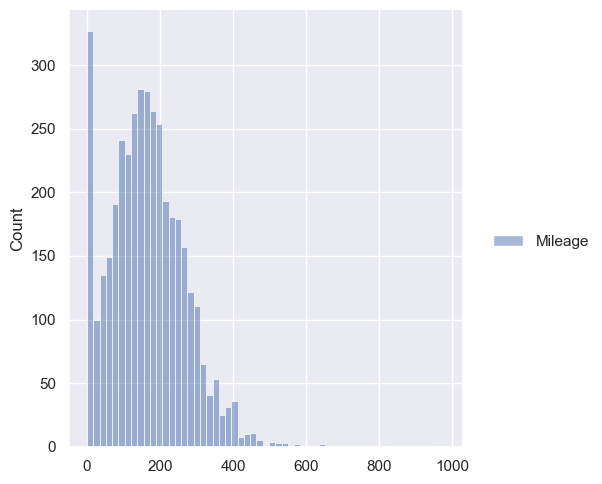

In [27]:
#Cleaning outliers from "MileAge"
sns.displot(data3[["Mileage"]])

In [29]:
q=data3[["Mileage"]].quantile(0.99)[0]
q

436.2000000000003

C:\Users\gayth\AppData\Local\Temp\ipykernel_23096\2435706463.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data4=data3[data2["Mileage"]<q]


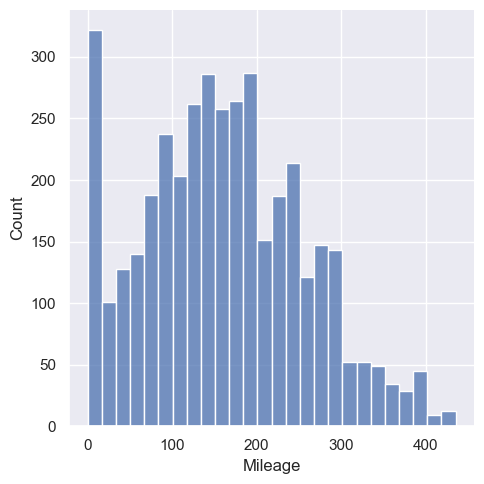

In [31]:
data4=data3[data2["Mileage"]<q]
sns.displot(data4["Mileage"])

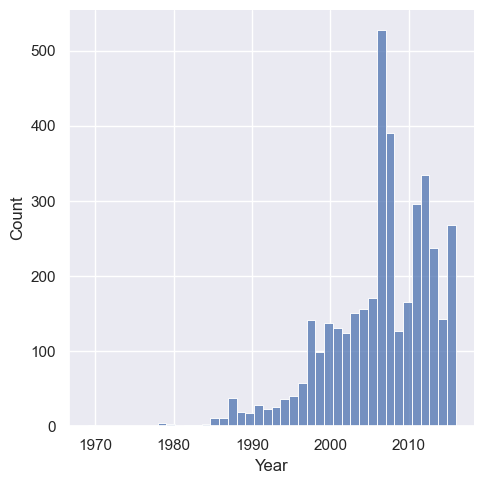

In [33]:
#Claning outliers from Year data
sns.displot(data4["Year"])

In [35]:
q=data4[["Year"]].quantile(0.01)[0]
q

1987.0

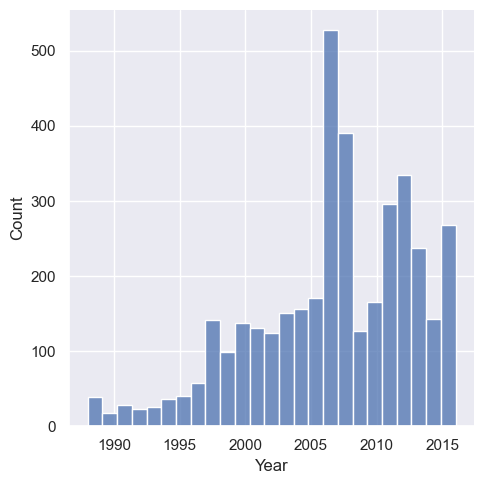

In [37]:
data5=data4[data4["Year"]>q]
sns.displot(data5["Year"])

In [39]:
#Now we need to clear Nan values (missing values)
cleaned_data=data5.dropna(axis=0)
#Check for missing values
cleaned_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [41]:
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [43]:
#Resetting indexes
cleaned_data=cleaned_data.reset_index()
cleaned_data

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...,...
3862,4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3863,4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3864,4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
3865,4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [45]:
#Calculating the statistical values of our final dataset
cleaned_data.describe(include="all")

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867.00,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,NaN,7,NaN,6,NaN,NaN,4,2,NaN
top,NaN,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,2172.33,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,1257.29,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,0.00,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,1078.50,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,2174.00,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,3269.50,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [47]:
#Let's create a linaer regression model, test it, train it and make predictions with it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv("your_file.csv")  # ← put your file here

# Select the features and target
X = cleaned_data[["EngineV", "Mileage", "Year"]]   # independent variables
y = cleaned_data["Price"]                           # dependent variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Coefficients: [8178.31540799  -59.60264824 1137.27753154]
Intercept: -2274533.5429438422
Mean Squared Error: 194733455.77105185
R² Score: 0.4987701215055528


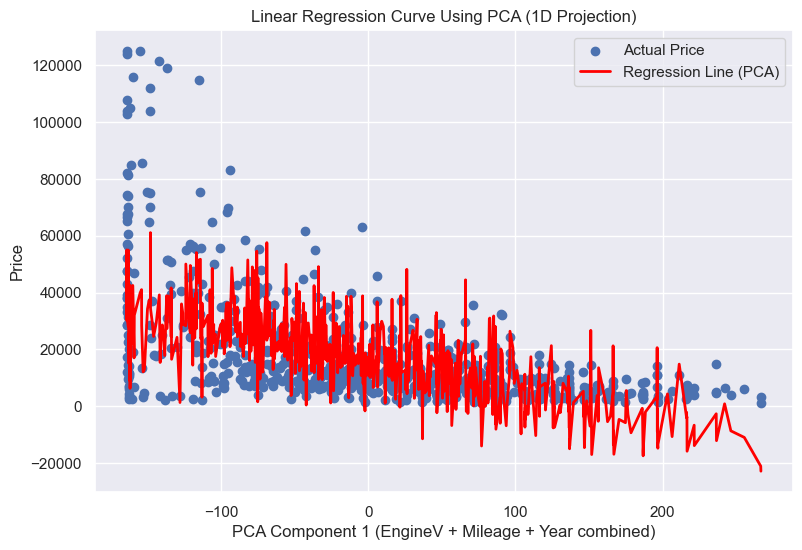

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# ---- 1. PCA reduction for visualization ----
pca = PCA(n_components=1)
X_test_pca = pca.fit_transform(X_test)

# Sort values for clean regression line drawing
sorted_idx = np.argsort(X_test_pca[:, 0])
X_pca_sorted = X_test_pca[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]

# ---- 2. Plot ----
plt.figure(figsize=(9, 6))

# Actual points
plt.scatter(X_pca_sorted, y_test_sorted, label="Actual Price")

# Regression line
plt.plot(X_pca_sorted, y_pred_sorted, color='red', linewidth=2, label="Regression Line (PCA)")

plt.xlabel("PCA Component 1 (EngineV + Mileage + Year combined)")
plt.ylabel("Price")
plt.title("Linear Regression Curve Using PCA (1D Projection)")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#predicting multiple cars prices
cars = pd.DataFrame({
    "EngineV": [2.0, 4.4, 1.6],
    "Mileage": [250, 350, 400],
    "Year": [2018, 2016, 2015]
})

predictions = model.predict(cars)

cars["Predicted Price"] = predictions
print(cars)


   EngineV  Mileage  Year  Predicted Price
0     2.00      250  2018         21948.48
1     4.40      350  2016         33341.62
2     1.60      400  2015          6324.93


In [57]:
#Creating Kmeans Clusters
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical features
X_cluster = cleaned_data[["EngineV", "Mileage", "Year"]]

# Create and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data["Cluster"] = kmeans.fit_predict(X_cluster)

print(cleaned_data.head(20))


    index          Brand    Price       Body  Mileage  EngineV Engine Type  \
0       0            BMW  4200.00      sedan      277     2.00      Petrol   
1       1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2       2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3       3           Audi 23000.00  crossover      240     4.20      Petrol   
4       4         Toyota 18300.00  crossover      120     2.00      Petrol   
5       7           Audi 14200.00      vagon      200     2.70      Diesel   
6       8        Renault 10799.00      vagon      193     1.50      Diesel   
7       9     Volkswagen  1400.00      other      212     1.80         Gas   
8      10        Renault 11950.00      vagon      177     1.50      Diesel   
9      11        Renault  2500.00      sedan      260     1.79      Petrol   
10     12           Audi  9500.00      vagon      165     2.70         Gas   
11     13     Volkswagen 10500.00      sedan      100     1.80  